In [40]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv("../Dataset/data.csv", on_bad_lines="skip")
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [42]:
df = df.dropna()
df.shape

(669639, 2)

<Axes: xlabel='strength', ylabel='count'>

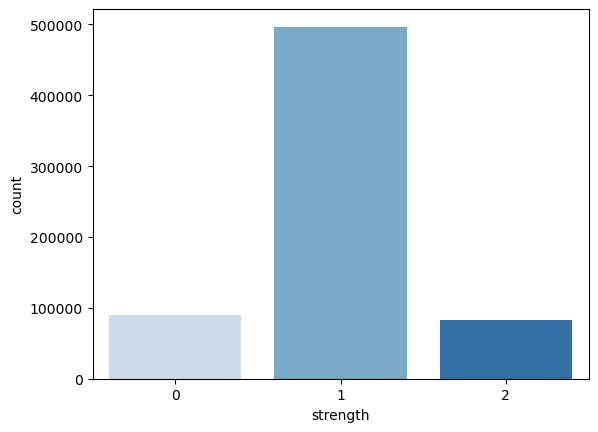

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="strength", palette="Blues")

In [44]:
X = df["password"]
y = df["strength"]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer="char", token_pattern=None)),
    ('xgb', XGBClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', token_pattern=None)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [47]:
pipe.score(X_test, y_test)

0.98095991876232

In [49]:
test = "password123"
result = pipe.predict([test])
print(result[0])

1


In [50]:
import pickle
with open("../Models/xgboost_model.pkl", "wb") as file:
    pickle.dump(pipe, file)